# ESTRUCTURA DE DATOS

## Implementación y Análisis de Complejidad de LinkedList, TailLinkedList y DoubleLinkedList

**Jared Mijail Ramírez Escalante**  
**[jramirezes@unal.edu.co](mailto:jramirezes@unal.edu.co)**


---

### Introduccion

En este documento se analizaran las complejidades algoritmicas de las estructuras Static Array, Linked list, Linked list con cola y Doubly Linked List, primera se vera la teoria de estos, despues se vera la complejidad experimental de los mismos junto a un analisis de porque se tienen estos resultados, se haran unas concluciones respecto a esto, y finalmente se tiene un apartado que estudia los binddings de c++ a Python.

---

### Teoria

Antes de nada empezemos viendo la teoria que diferencia estras 4 estructuras.

---

**Static Array**  
Un Static Array es una estructura de datos con un tamaño fijo que ocupa un espacio continuo en memoria. Esto permite un acceso rápido a sus elementos mediante índices, ya que el puntero inicial y el tamaño de cada elemento permiten calcular directamente la posición deseada.

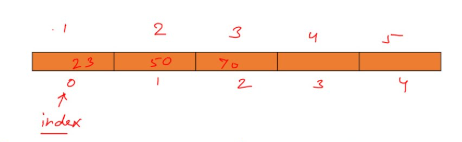

---

- **Complejidad Algorítmica:**
  - `empty`: \( O(1) \) (verifica si el tamaño actual es 0).
  - `pushFront`: \( O(n) \) (requiere mover todos los elementos una posición hacia adelante).
  - `pushBack`: \( O(1) \) (si no está lleno, agrega al final).
  - `popFront`: \( O(n) \) (requiere mover todos los elementos una posición hacia atrás).
  - `popBack`: \( O(1) \) (reduce el tamaño y elimina el último elemento).
  - `find`: \( O(n) \) (búsqueda lineal).
  - `erase`: \( O(n) \) (requiere mover los elementos para llenar el hueco).
  - `addBefore`: \( O(n) \) (similar a `erase`, desplazando elementos).
  - `addAfter`: \( O(1) \) (como `addBefore` dependiendo de la posición).

---

**Linked List**  
Una Linked List consiste en nodos que contienen datos y un puntero al siguiente nodo. Estos nodos no necesitan estar almacenados en memoria contigua'. Sin embargo, la búsqueda es menos eficiente debido a la falta de acceso directo.

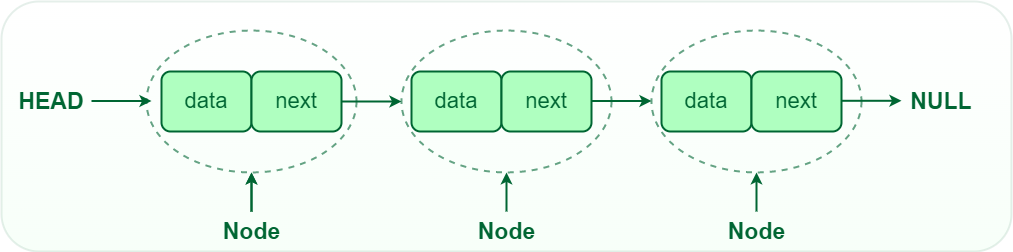

---

- **Complejidad Algorítmica:**
  - `empty`: \( O(1) \) (verifica si el puntero inicial es `nullptr`).
  - `pushFront`: \( O(1) \) (crea un nuevo nodo y lo enlaza al inicio).
  - `pushBack`: \( O(n) \) (requiere recorrer la lista hasta el último nodo).
  - `popFront`: \( O(1) \) (elimina el primer nodo y actualiza el puntero inicial).
  - `popBack`: \( O(n) \) (recorre la lista para encontrar el penúltimo nodo).
  - `find`: \( O(n) \) (búsqueda lineal).
  - `erase`: \( O(n) \) (requiere encontrar el nodo y ajustar los punteros).

---

**Linked List con Cola**  
Es una Linked List que además mantiene un puntero al último nodo (cola), optimizando operaciones que requieren acceso al final de la lista.

- **Complejidad Algorítmica:**
  - Igual a la Linked List para todas las operaciones excepto:
    - `pushBack`: \( O(1) \) (usa el puntero de la cola).

---

**Doubly Linked List**  
Una Doubly Linked List es una Linked List en la que cada nodo tiene punteros al nodo siguiente y al anterior. Esto permite una navegación bidireccional, mejorando ciertas operaciones.

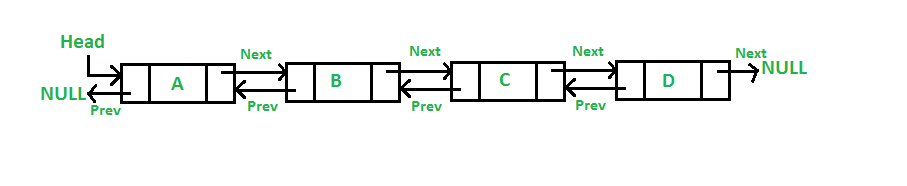

---

- **Complejidad Algorítmica:**
  - `empty`: \( O(1) \).
  - `pushFront`: \( O(1) \) (crea un nodo y actualiza los punteros hacia adelante y atrás).
  - `pushBack`: \( O(1) \) (similar a `pushFront`, utilizando el puntero de la cola).
  - `popFront`: \( O(1) \) (elimina el primer nodo y ajusta los punteros).
  - `popBack`: \( O(1) \) (elimina el último nodo y ajusta los punteros).
  - `find`: \( O(n) \).
  - `erase`: \( O(n) \) (requiere ajustar punteros hacia adelante y atrás).

---



### Implementacion

Las estructuras fueras escritas en C++ y despues convertidas en un paquete que pueda ser importando por phyton. Por esta razon aunque las estructuras en C++ tenga un tipo variable a la hora de definirlos, atraves de un 'template <typename T>', a la hora de copilar el modulo es necesario definir un unico tipo, en este caso fue un int. 

Acontinuacion se importaran las estructuras que compararemos algoritmicamente y se creara el objeto que utilizaremos para estos

In [2]:
from structures import linkedLTail
from structures import linkedL
from structures import linkedLDouble
from structures import listPy
from structures import list

Se utilizara matplotlib para generar los graficos necesarios y por consiguiente es necesario utilizar numpy, para poder guardar los tiempos 

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import time

Acontinuacion creamos la funcion que nos va a permitir hacer nuestras evaluaciones de la complejidad algoritmica, esta funcion hace multiples veces las mediciones y despues las promedia para generar la grafica de complejidad

Esta funcion resive el metodo que se va evaluar en **meth**, una funcion que genera las clases  que se van a evaluar y devuelva un diccionario con los nombres de estos objetos y los objetos en si mismos, con **clear**, resive el espacio en el que se van evaluar hasta cuantos elementos con **linspace** ,si es necesario llenar las estrucuras de eleementos para la funcion que se va a evaluar, esto con **fill** y **trails** que dice cuantas veces se van a generar los datos.

In [18]:
# llenar las listas
def populate(classes, linspace):
    for n in range(linspace):
        for method, instance in classes.items():
            instance.pushFront(0)
    return classes

# Función para medir tiempos de ejecución
def measure_execution_times(instance, method, fill):
    start_time = time.time()
    if(fill): {method() } 
    else: method(0)  
    end_time = time.time()
    return (end_time - start_time) * 1e6  # Convertir a microsegundos

def random_experiment(meth: str, trails: int, linspace: int, clear, fill: bool = False):
    # Lista de tamaños de prueba
    element_counts = np.linspace(1, linspace, linspace, dtype=int)
    trail_times = []
    num_trials = trails
    for trail in range(num_trials):
        # Diccionario para almacenar tiempos por método
        classes = clear()
        if(fill): classes = populate(classes, linspace)
        
        times_by_class = {method: [] for method in classes.keys()}

        # Recolectar tiempos de ejecución
        for count in element_counts:
            for method, instance in classes.items():
                exec_time = measure_execution_times(instance, getattr(instance, meth), fill)
                times_by_class[method].append(exec_time)
        trail_times.append(times_by_class)

    # Calcular el promedio de tiempos para cada método
    times_by_class_avg = {method: np.mean([trial[method] for trial in trail_times], axis=0)
                        for method in classes.keys()}

    # Graficar los resultados
    plt.figure(figsize=(12, 8))
    for method, times in times_by_class_avg.items():
        plt.plot(element_counts, times, label=method)

    plt.xlabel('Tamaño de la lista (n)')
    plt.ylabel('Tiempo de ejecución (μs)')
    plt.title('Comparación de Complejidades ' + meth)
    plt.legend()
    plt.grid(True)
    plt.show()


La funcion genera un grafico de numeros de elementos vs tiempo de ejecucion. Se define un measure_execution_times, que simplemente dado un tiempo inicial y final, mide cuanto paso entre estos dos tiempos, mientrs se ejecutaba la funcion. 

Esta funcion esta en un bucle for que va cambiando el objeto que se tiene que evaluar, lo que a su ves esta en un for que se repite por el numero de elementos que se van a poner o quitar en las estructuras de datos, que a su ves esta en un for con el numero de veces que se va a repetir lo anteriormente mencionado.

Esta repeticion se hace para poder hacer un promedio de los datos generados, esta funcion de por si tiene una complejidad algoritmica de o(n^3), pues crece segun trails x linspace x cantidad de estructuras, y habria que añadir la complejidad de las propias funciones y estructuras a evaluar.

In [ ]:
def clear():
    listCPP = listPy.StaticArrayList(10000)
    ll = linkedL.LinkedList()
    llt = linkedLTail.LinkedList()
    lld = linkedLDouble.LinkedList()
    classes = {
    'LinkedList': ll,
    'Linked List with Tail': llt,
    'Linked List Double': lld,
    'C++ List': listCPP
    }
    return classes

---

### Analisis




**pushFront**

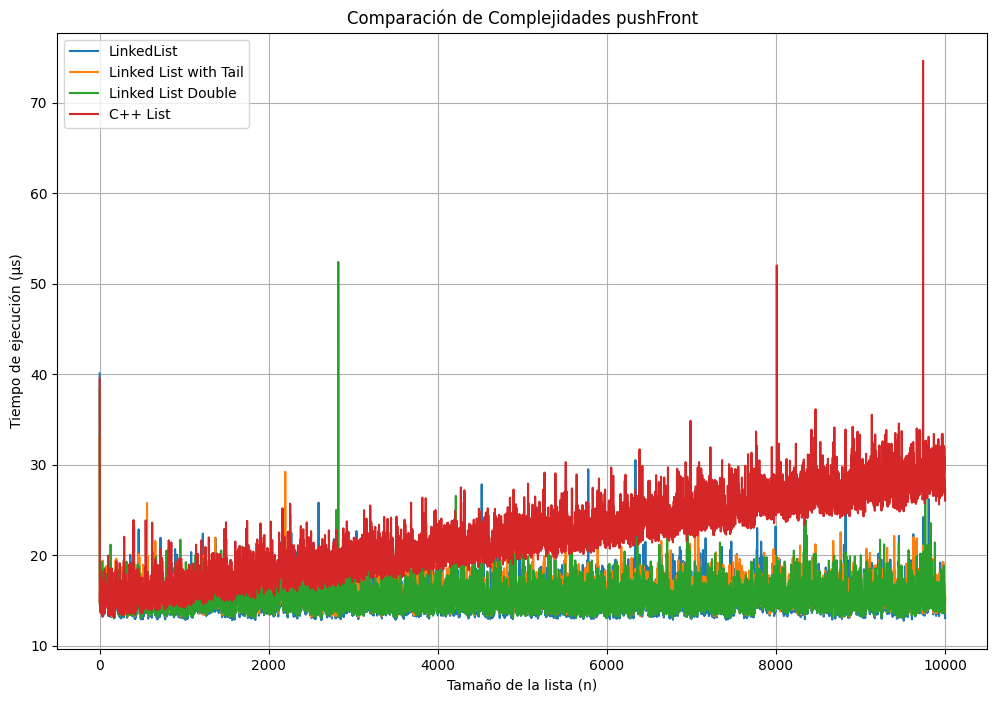

In [ ]:

random_experiment("pushFront", 100, 10000, clear)

Podemos visualizar como la complejidad algoritmica de las LinkedLIst es O(1), mientras que la lista tiene una complejidad O(n)

In [ ]:
    void pushFront(int key) {
        Node* nodo = new Node(key);
        nodo->next = head;
        head = nodo;
    }

La implementacion solo requiere crear el nuevo nodo, que este nodo apunte al anterior primer elemento, y finalmente que la cabeza apunte a este elemento, cunado se tiene una cola y cuando es doble, solo se tiene que tener en cuenta estos dos punteros adicional, en mi implementacion before y tail.

In [ ]:
        if (head != nullptr) {
            head->before = nodo;
        }
        if (tail == nullptr) {
            tail = nodo; // Si es el primer nodo, actualizar el tail
        }

---

**popFront**

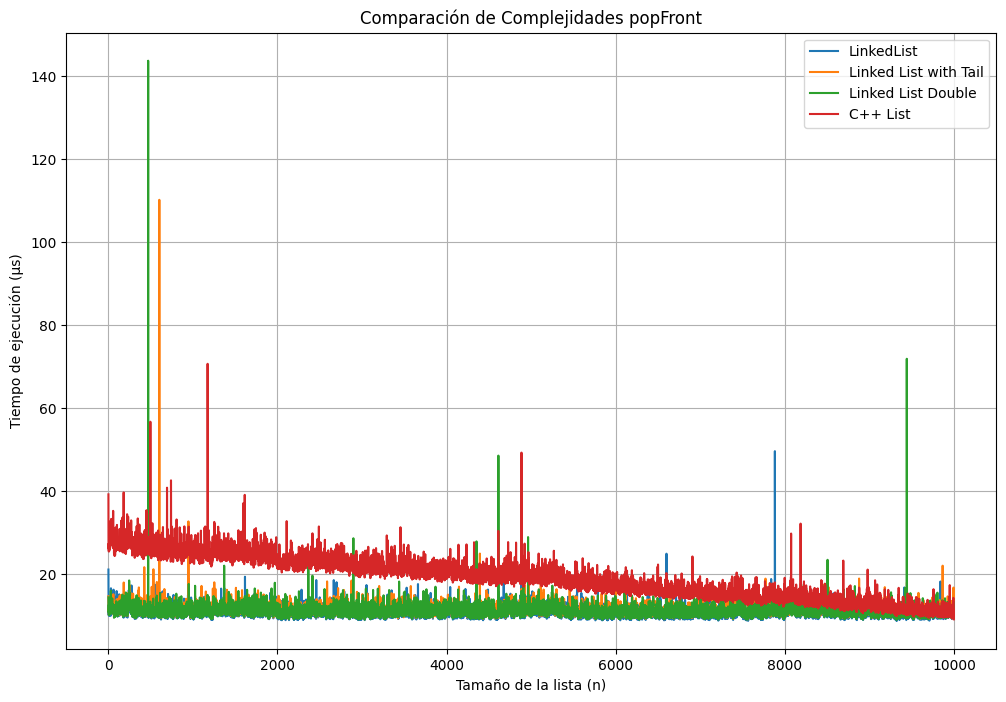

In [22]:
random_experiment("popFront", 100, 10000, clear, fill=True)

Aca vemos el grafico invertido, ya que iniciamos con muchos elementos y vamos tomando los tiempos segun los vamos quitando, pero de igual forma podemos ver el mismo comportamiento que push front, pues esta funcion tiene un comportamiento muy similar, O(1) para el linked list, y o(n) para el array.

In [ ]:
    void popFront() { // Quitar nodo al comienzo
        if (head == nullptr)
            throw runtime_error("Lista vacía. No se puede eliminar el elemento.");
        Node<T>* temp = head;
        head = head->next;
        if (head != nullptr) {
            head->before = nullptr;
        } else {
            tail = nullptr; // Lista quedó vacía
        }
        delete temp;
    }

Podemos ver que solo es necesario mover el puntero de la cabeza para que ahora apunte al elemento siguiente al que apuntaba, si es una double linked list, también será necesario decir al elemento que ahora es la cabeza que no hay un elemento antes de él, convirtiendo el apuntador before en nulo, y si la lista está vacía también es necesario indicarle a la cola que ahora está vacía.

**pushBack**

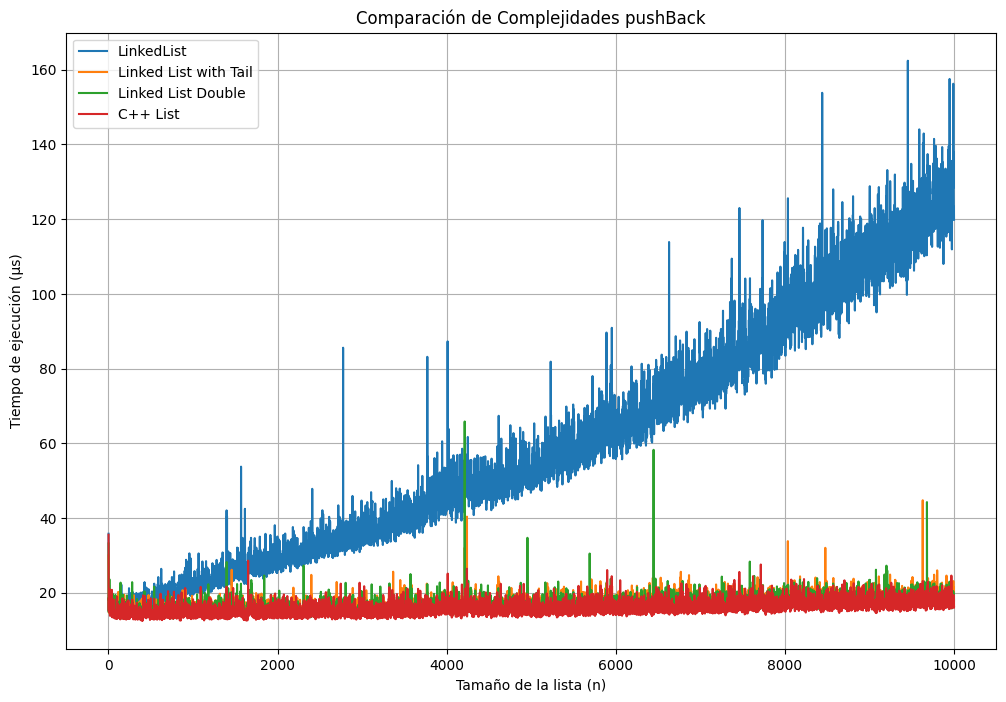

In [23]:
random_experiment("pushBack", 100, 10000, clear)

Acá vemos que todas las estructuras tienen una complejidad O(1) excepto la linkedList, recordemos que la static list, solo requiere poner el valor en el último índice y aumentar la variable size.

In [ ]:
    void PushBack(const T& element) {
        if (size >= max_size) throw std::overflow_error("List is full");
        data[size++] = element;
    }

Por el otro lado la linkedList requiere recorrer toda la lista hasta encontrar el elemento que tenga como siguiente elemento un puntero nulo.

In [ ]:
    void pushBack(int key) {
        Node* nodo = new Node(key);
        if (head == nullptr) {
            head = nodo;
        } else {
            Node* temp = head;
            while (temp->next != nullptr) {
                temp = temp->next;
            }
            temp->next = nodo;
        }
    }

Cosa que no pasa en la doubleLinked list o con Tail, pues tenemos directamente la referencia tail que nos indica donde está este elemento y nos permite añadirlo, de forma muy parecida al pushFront. Entonces se crea el nuevo nodo se hace que el nodo que estaba al final apunte a este, que el nuevo nodo, su before sea el nodo que anteriormente era la tail, y finalmente convertir el nuevo nodo en la tail.

In [ ]:
    void pushBack(T key) { // Agregar nodo al final
        Node<T>* nodo = new Node<T>(key);
        if (tail != nullptr) {
            tail->next = nodo;
            nodo->before = tail;
        } else {
            head = nodo; // Si la lista está vacía, actualizar el head
        }
        tail = nodo;
    }

Algo que resalta es que la complejidad algoritmica del pushBack de la linkedList es mayor que la complejidad algoritmica del pushFront de la estatic list, por bastante, asi pertenezcan a la misma familia, posiblemente porque el pushFront de la linkedList es mucho mas complejo

---

**popBack** 

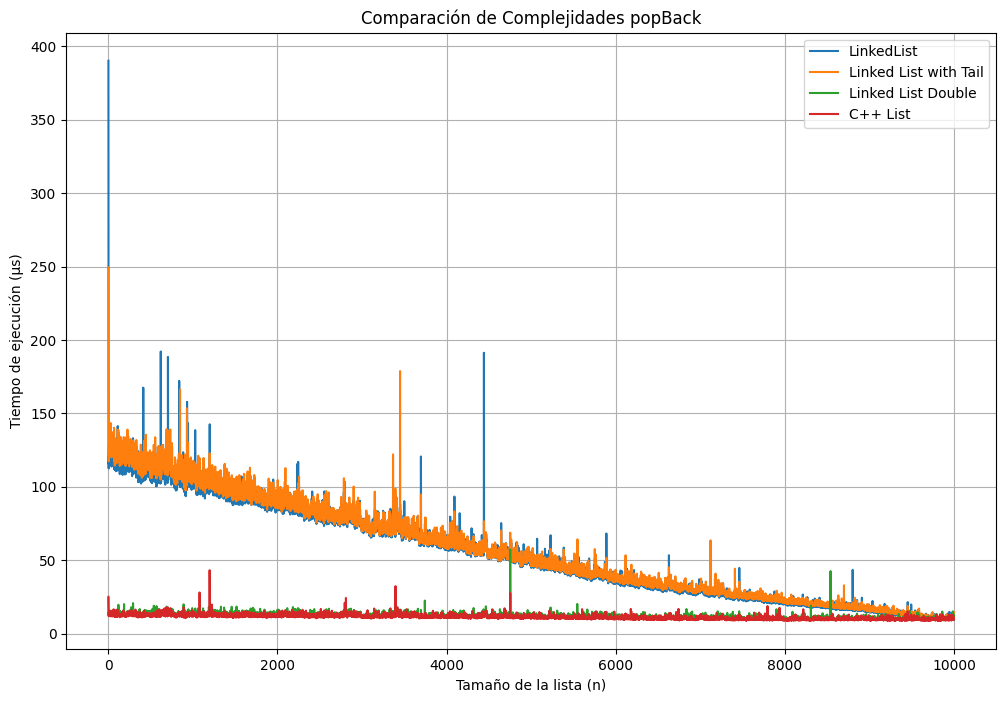

In [24]:
random_experiment("popBack", 100, 10000, clear, fill=True)

Como en pushBack tenemos la grafica al reves por la forma en la que se implementa la medicion de tiempo, por otro lado vemos que la complejidad de La linked list con y sin cola, es de o(n), mientras que las demas estructuras osea la lista estaitca y la double linked list es de o(1).

Otra cosa a resaltar es que podemos ver que la familia de la linked list con y sin cola, son distintas, y mientras mayor la cantidad de elementos es mas notorio, lo que es natural pues la linked list con cola tiene pasos mas complejos.

In [ ]:
// sin cola
    void popBack() {
        if (head == nullptr)
            throw runtime_error("Lista vacía. No se puede eliminar el último elemento.");
        if (head->next == nullptr) {
            delete head;
            head = nullptr;
            return;
        }
        Node* temp = head;
        while (temp->next->next != nullptr) {
            temp = temp->next;
        }
        delete temp->next;
        temp->next = nullptr;
    }


In [ ]:
// DOUBLE
    void popBack() { // Quitar nodo al final
        if (tail == nullptr)
            throw runtime_error("Lista vacía. No se puede eliminar el elemento.");
        Node<T>* temp = tail;
        tail = tail->before;
        if (tail != nullptr) {
            tail->next = nullptr;
        } else {
            head = nullptr; // Lista quedó vacía
        }
        delete temp;
    }

Esta es la mejora que trae la double linked list, pues en las otras dos estructuras de la misma clase( con y sin cola), tenemos una referencia al último elemento, pero de igual forma necesitamos acceder al elemento anterior al último elemento para cambiar la referencia que este tiene del elemento que le sigue, elemento al que podemos acceder muy fácilmente con la double. y no podemos en las otras dos estructuras, pues tenemos un bucle que se detiene hasta encontrar el penúltimo elemento.

In [ ]:
    void PopBack() {
        if (Empty()) throw std::underflow_error("List is empty");
        size--;
    }

La implementacion en la listica estatica tambien es muy facil, pues solo tenemos que reducir la variable que hace referencia al tamaño del array.

---

**Otras Funciones**

En esta seccion se discutira la complejidad de las otras funcion/metodos, ya que realmente ya se vieron las principales y otras funciones pueden ser vistas como variaciones de las mismas.

---

**find y erase**

Find y erase son funciones muy similares, pues erase requiere de los mismos pasos que find, pero pues erase hace el borrado despues de encontrar el elemento.

In [ ]:
    bool booleanFind(T key) { // Verificar si el elemento existe
        Node<T>* temp = head;
        while (temp != nullptr) {
            if (temp->data == key)
                return true;
            temp = temp->next;
        }
        return false;
    }

    void erase(T key) { // Eliminar nodo con valor específico
        if (head == nullptr)
            throw runtime_error("Lista vacía. No se puede eliminar el elemento.");
        if (head->data == key) {
            popFront();
            return;
        }
        Node<T>* temp = head;
        while (temp != nullptr && temp->data != key) {
            temp = temp->next;
        }
        if (temp == nullptr)
            throw runtime_error("El elemento no existe.");
        if (temp->next != nullptr) {
            temp->next->before = temp->before;
        }
        if (temp->before != nullptr) {
            temp->before->next = temp->next;
        }
        if (temp == tail) {
            tail = temp->before;
        }
        delete temp;
    }

Find y Erase no se benefician de tener cola o ser double, mas bien se añade mas complejidad al tener que manejar los punteros before de los nodos y el tail de las estructura. Talves se podria tener una mejora si se tienen procesos paralelos uno que empieze a buscar desde la cola y otro desde la cabeza, eso en teoria reduciria la compejidad a la mitad pero seguiria pertenesiendo a la misma familia.

En cuanto a algoritmo es como un popBack de una linked list sin cola, pues se tiene que recorrer la estructura hasta encontrar algo, en el caso de popBack un nodo que apunte a nulo, en este caso un nodo que tenga cierto valor. 

De forma que la complejidad es o(n) como maximo pues tambien puede ser que el elemnto este al principio por lo cual seria o(1), cosa que pasaria que lo implementara en mi codigo aunque habria que hacer otras modificaciones.

--- 

**KeyFront y KeyTopBack**

In [ ]:
    T keyFront() { // Retornar dato al comienzo
        if (head == nullptr)
            throw runtime_error("Lista vacía. No se puede obtener el elemento.");
        return head->data;
    }

        T keyTopBack() { // Retornar dato al final
        if (tail == nullptr)
            throw runtime_error("Lista vacía. No se puede obtener el elemento.");
        return tail->data;
    }


Estos métodos son muy parecidos a popFront-pushFront y popBack-popFront, en el sentido que hasta cierto punto los algoritmos son iguales, con front se tiene que encontrar el elemento del principio, y con back el del final, para un static array, Linked List con Cola y una Double Linked List, la complejidad es O(1) para los dos métodos, pues en los tres casos existe una forma rápida de acceder a los elementos del principio y del final, por el contrario, la linkedlist, tienen que encontrar este final recorriendo toda la estructura hasta hallar el puntero nulo, de forma que su complejidad es O(n) para KeyTopBack, para KeyFront si es O(1).

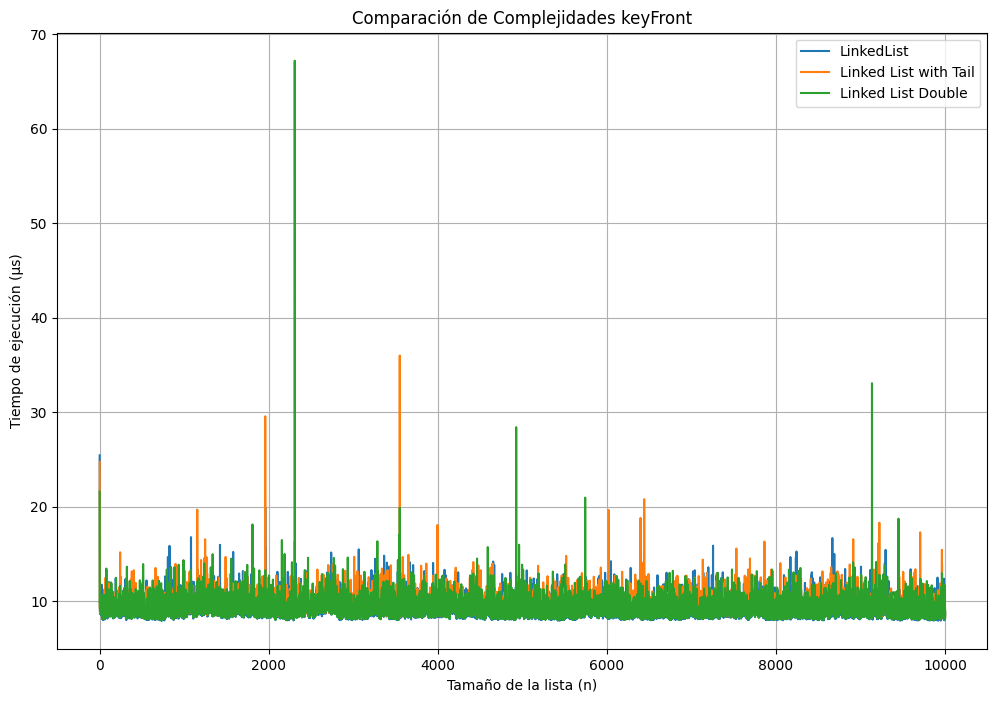

In [32]:
def clear():
    ll = linkedL.LinkedList()
    llt = linkedLTail.LinkedList()
    lld = linkedLDouble.LinkedList()
    classes = {
    'LinkedList': ll,
    'Linked List with Tail': llt,
    'Linked List Double': lld,
    }
    return classes
random_experiment("keyFront", 100, 10000, clear, fill=True)

Aca vemos la complejidad o(1) de keyFront, no esta la lista estatica pues no se tiene implementado ese metodo para esa estructura

---

**addAfter y addBefore**

Por otro lado de estas dos funciones solo se puede hablar de forma teorica de la implementacion discutida en clase, talves hay una forma de manejar punteros atraves de un bindding en phyton pero ya haria muy complejo el codigo, de igual forma dados un puntero y entendiendo los anteriores algoritmicos es muy facil de analizar estos metodos, addAfter es como un popFront, en todos los casos de las LinkedList, decho es un caso particular pues en pushFront se te esta dando el puntero del comienzo. La complejidad de este es o(1).

Por otro lado addBefore se ve beneficiado de la doubly, pues entonces es muy facil acceder al elemento antes del puntero dado, de lo contrario es necesario hacer un bucle hasta encontrar este elemento antes, igual puede ser visto como un caso particular de popBack, en el que igual existe el problema de que es necesario acceder al elemento antes del elemento final solo que en este caso se hayade

de igual forma esta seria la implementacion.


In [ ]:
void addBefore(Node<T>* refNode, T value) {
    if (refNode == nullptr) {
        throw std::runtime_error("Nodo de referencia no puede ser nulo.");
    }
    Node<T>* newNode = new Node<T>(value);
    newNode->next = refNode;
    newNode->before = refNode->before;

    if (refNode->before != nullptr) {
        refNode->before->next = newNode;
    } else {
        head = newNode; // Si el nodo de referencia era el primero
    }
    refNode->before = newNode;
}

void addAfter(Node<T>* refNode, T value) {
    if (refNode == nullptr) {
        throw std::runtime_error("Nodo de referencia no puede ser nulo.");
    }
    Node<T>* newNode = new Node<T>(value);
    newNode->before = refNode;
    newNode->next = refNode->next;

    if (refNode->next != nullptr) {
        refNode->next->before = newNode;
    } else {
        tail = newNode; // Si el nodo de referencia era el último
    }
    refNode->next = newNode;
}


y para una LinkedList sin cola

In [ ]:
void addBefore(Node<T>* refNode, T value) {
    if (refNode == nullptr) {
        throw std::runtime_error("Nodo de referencia no puede ser nulo.");
    }
    if (refNode == head) {
        pushFront(value); // Si el nodo de referencia es el primero, usar pushFront
        return;
    }
    Node<T>* temp = head;
    while (temp != nullptr && temp->next != refNode) {
        temp = temp->next;
    }
    if (temp == nullptr) {
        throw std::runtime_error("Nodo de referencia no encontrado en la lista.");
    }
    Node<T>* newNode = new Node<T>(value);
    newNode->next = refNode;
    temp->next = newNode;
}

El addAfter es casi igual al del double pero sin el manejo de los punteros extra.

---

**empty**

Para esta funcion no hay mucho que decir, realmente es saber si hay un elemento al principio lo que es en todos los casos o(1) por obvias razones.

---

### Conslusiones

**Resumen Comparativo**

| Operación     | Static Array | Linked List | Linked List con Cola | Doubly Linked List |
|---------------|--------------|-------------|-----------------------|--------------------|
| `empty`       | \( O(1) \)   | \( O(1) \)  | \( O(1) \)            | \( O(1) \)         |
| `pushFront`   | \( O(n) \)   | \( O(1) \)  | \( O(1) \)            | \( O(1) \)         |
| `pushBack`    | \( O(1) \)   | \( O(n) \)  | \( O(1) \)            | \( O(1) \)         |
| `popFront`    | \( O(n) \)   | \( O(1) \)  | \( O(1) \)            | \( O(1) \)         |
| `popBack`     | \( O(1) \)   | \( O(n) \)  | \( O(n) \)            | \( O(1) \)         |
| `find`        | \( O(n) \)   | \( O(n) \)  | \( O(n) \)            | \( O(n) \)         |
| `erase`       | \( O(n) \)   | \( O(n) \)  | \( O(n) \)            | \( O(n) \)         |
| `addBefore`   | \( O(1) \)   | \( O(n) \)  | \( O(n) \)            | \( O(1) \)         |
| `addAfter`    | \( O(1) \)   | \( O(1) \)  | \( O(1) \)            | \( O(1) \)         |

Este cuadro sirve para poder finalmente visualizar la complejidad algorítmica de las diferentes estructuras y sus métodos. Se pueden decir muchas cosas pero algo que resalta es que el static Array es realmente rápido, a pesar de que su tamaño sea inmutable y a pesar de su complejidad o(n) en pushFront y popFront, encontra de la Doubly Linked List, el array estático es una estructura simple, que crece con una pendiente no muy alta y que solo empieza a afectar notoriamente con cantidades masivas de elementos.

De igual forma si se obtuvieron los resultados que se esperaban de forma práctica, según la teoría.

También se genera la pregunta que tipo de estructura son las listas de python regulares cosa que se podría concluir después evaluando su complejidad algorítmica.

Algo más a resaltar es que el tiempo de ejecución de los métodos en realidad tiene bastante margen de variación, aunque es algo esperado pues hablamos de cantidades de tiempo minúsculas e imperceptibles para una persona.

Otra inquietud es respecto a la implementación de addBefore y addAfter esperada, porque si se da un puntero se concluye que estos métodos para el static array son O(1), aunque en su momento no se implementó de esta manera.


---

### Bindding

Acontinuacion un analisis que no fue solicitado pero que si aporta mucho a nivel teorico y que de igual forma es relevante para mi implementacion de estas estructuras y la construccion de este analisis.

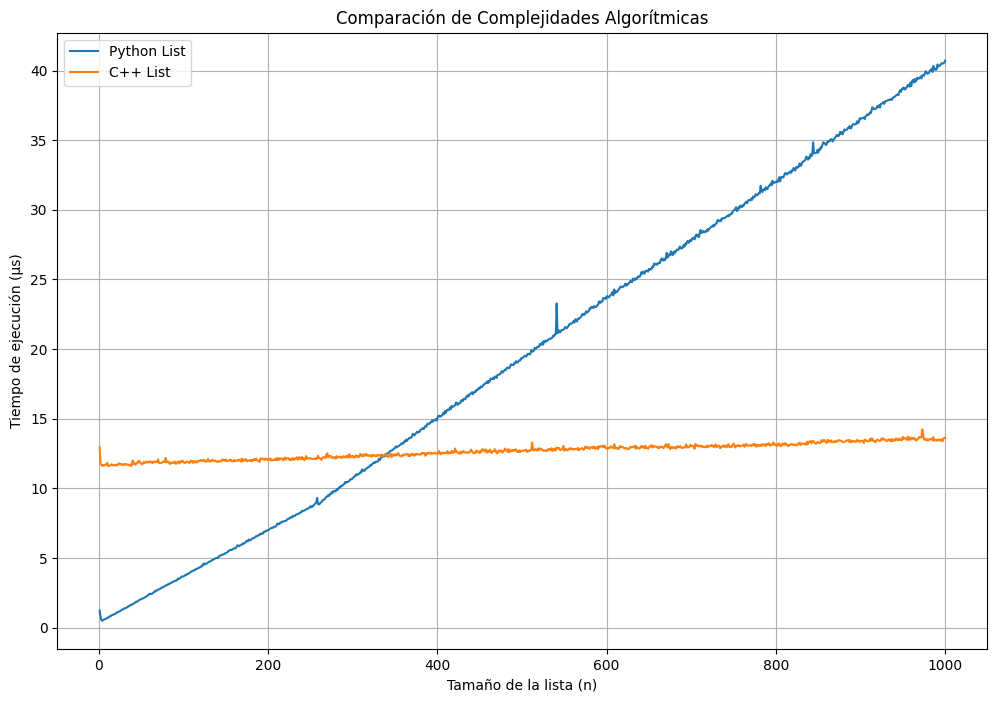

In [ ]:
len = 1000
def clear():
    listPyp = list.StaticArrayList(len)
    listCPP = listPy.StaticArrayList(len)
    classes = {
    'Python List': listPyp,
    'C++ List': listCPP
    }
    return classes
random_experiment("pushFront", 10000, len, clear)

Este gráfico nos permite visualizar la diferencia de velocidades en c + + y Python, o si se quiere ver de un lenguaje interpretado y uno compilado.


Vemos que la pendiente de la gráfica de python es mucho mayor a la pendiente de la gráfica de c++, sin embargo c++ empieza con una velocidad mucho más lenta, esto es por el overhead que existe para hacer el binding, osea un tiempo adicional para hacer la conexión entre c++ y python, aproximadamente a los 370 elementos empieza a ser más eficiente c++.


**Compilación y herramientas**


Para hacer el binding de c++  a Python se utilizó PyBind11, hubieron múltiples complicaciones para instalar este paquete, pues no fue posible con los administradores de paquetes de c++, **conan2 y vcpkg**, con conan 2 no se detectaban los paquetes y con vcpkg había un problema con ninja,que no permitía instalar el paquete.


Finalmente se resolvió que se podía utilizar **pip** para instalar este paquete, pues la ([documentacion de pybind11](https://pybind11.readthedocs.io/en/stable/compiling.html#generating-binding-code-automatically)) indicaba que este se podía usar, y fue efectivamente la solución más fácil y rápida, solo que para que funcione la instalación tiene que hacerse de forma global.


Esto porque paa la compilación se utiliza Cmake, una herramienta para la automatización de la compilación de código de c/c++, en el archivo que define como hacer esta compilación, el automáticamente encuentra el phyton para el cual se quiere hacer la compilación y el pybind11 instalado.
Esto realmente facilitó mucho la creación de este archivo pues se presentaron muchos problemas para hacerlo.


El formato del archivo CMake es el que se presenta a continuación


In [ ]:
cmake_minimum_required(VERSION 3.15...3.22)
project(listPy LANGUAGES CXX)

find_package(Python 3.13 COMPONENTS Interpreter Development REQUIRED)
find_package(pybind11 CONFIG REQUIRED)


pybind11_add_module(listPy listPy.cpp)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2789914765.py, line 1)

Para la copilacion del codigo se utilizaron los siguientes comandos dentro de la carpeta donde se encuentra el codigo c++

In [ ]:
$ cmake -S . -B build
$ cmake --build build -j 2  # Build on 2 cores
$ cmake --install build

En cuanto a la implementacion en el codigo c++, esto es realmente facil, hay que especificar los objetos y clases que seran exportados a phyton, especificar su descripcion su nombre en la clase exportada y si resiven argumentos, ademas especificar sus distintos metodos

In [ ]:
# C++

PYBIND11_MODULE(linkedL, m) {
    m.doc() = "Python bindings for LinkedList"; 

    py::class_<LinkedList>(m, "linkedL")
        .def(py::init<>()) // Constructor por defecto
        .def("pushFront", &LinkedList::pushFront, py::arg("key"), "Agrega un nodo al inicio de la lista")
        .def("pushBack", &LinkedList::pushBack, py::arg("key"), "Agrega un nodo al final de la lista")
        .def("popFront", &LinkedList::popFront, "Elimina el nodo al inicio de la lista")
        .def("popBack", &LinkedList::popBack, "Elimina el nodo al final de la lista")
        .def("keyFront", &LinkedList::keyFront, "Devuelve el valor del nodo al inicio de la lista")
        .def("keyTopBack", &LinkedList::keyTopBack, "Devuelve el valor del nodo al final de la lista")
        .def("find", &LinkedList::booleanFind, py::arg("key"), "Devuelve si un elemento está en la lista")
        .def("erase", &LinkedList::erase, py::arg("key"), "Elimina un nodo con un valor específico")
        .def("empty", &LinkedList::booleanEmpty, "Devuelve si la lista está vacía")
        .def("print_list", &LinkedList::PrintList, "Imprime la lista");
}

**Archivos .pyd, .pyz, .pyo**

Aprendiendo como funciona y que es lo que hace PyBind, se aprendio de estos 3 tipos de optimizacion de archivos de python, con lo que se entiende porque se generaba el pycache a la hora de correr un programa con modulos de phyton, un archivo .pyc acelera el timpo de importacion de modulos, pues el codigo binario de estos, .pyo no se genera automaticamente pero son equivalentes a .pyc, solo que eliminan ciertos elmentos del codigo para optimizar mas los tiempos de carga pero las mejoras no suelen ser muchas.

Mientras tanto un .pyd (Python Dynamic module) es una forma de optimizar como tal el tiempo de ejecucion de una libreria en phyton en este caso se genera este archivo apartir de codigo en c++, osea codigo ya copilado no es necesario que pase por el inteprete de python lo que es lento, el .pyd es especifico de **windows** y es equivalente a un .dll que tambien es relativamente equivalente a un .exe

Esta es la razon por la cual una libreria como **NumPy** es eficiente, esta esta escrita en c/c++ y atraves de un bindding es utiliza en phyton, lo mismo pasa con librerias que requieren una alta eficiencia computacional como lo es **PyTorch o TensorFlow**, que estan escritas en CUDA-C++.

Hay que notar que el archivo .pyd es especifico de windows para linux y macOS se genera otro tipo de archivo.